# 分布
- 直方图（histogram）：展示每个值的频数（frequency）的图形。

## 全国家庭增长调查中的变量

In [3]:
%matplotlib inline
from __future__ import print_function, division

import numpy as np
import pandas
import thinkstats2
import thinkplot
import nsfg

In [4]:
def MakeFrames():
    """Reads pregnancy data and partitions first babies and others.

    returns: DataFrames (all live births, first babies, others)
    """
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    assert len(live) == 9148
    assert len(firsts) == 4413
    assert len(others) == 4735

    return live, firsts, others
live, firsts, others = MakeFrames()

### 新生儿体重的磅值直方图
- xlabel=磅
- ylabel=频数

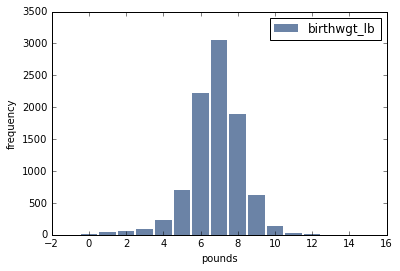

In [5]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='pounds',
                ylabel='frequency')

`众数`：结果中出现最多的数：7磅。

### 新生儿体重的盎司值直方图
- xlabel=盎司
- ylabel=频数

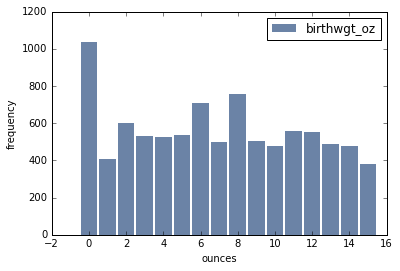

In [6]:
hist = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='ounces',
                ylabel='frequency')

预期这个分布是均匀(uniform)分布，0的频数最高，1和15频数最低。这可能是因为调查参与者将接近整数的体重值进行了四舍五入。

### 产妇在妊娠结束时的年龄直方图
- xlabel=年龄
- ylabel=频数

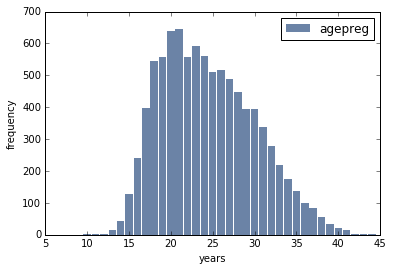

In [7]:
hist = thinkstats2.Hist(np.floor(live.agepreg), label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years',
                ylabel='frequency')

### 妊娠周期直方图
- xlabel=周
- ylabel=频数

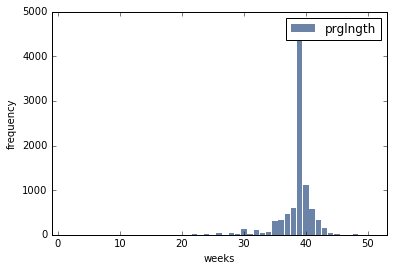

In [8]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks',
                ylabel='frequency',
                axis=[-1, 53, 0, 5000])

## 离群值
在成功生产记录的妊娠列表中，最小的10个数和最大的10个数

In [9]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [10]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


## 第一胎

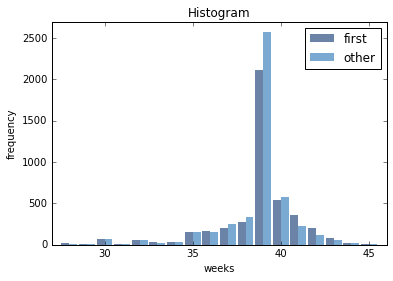

In [11]:
first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(title='Histogram',
                   xlabel='weeks',
                   ylabel='frequency',
                   axis=[27, 46, 0, 2700])

## 统计量
- mean：均值 $\bar{x}=\frac{1}{n}\sum_i{x_i}$
- var：方差  $S^2=\frac{1}{n}\sum_i{(x_i-\bar{x})^2}$
- std：标准差
- effect size：描述效应大小的汇总统计量
    - 均值的差值：描述两个群组之间的差异
    - Cohen d：将群组间的差值与群组内的变化性进行比较 $Cohen d = \frac{\bar{x_1}-\bar{x_2}}{s}$ ， s：合并标准差

In [12]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

print('Live mean', mean)
print('Live variance', var)
print('Live std', std)

mean1 = firsts.prglngth.mean()
mean2 = others.prglngth.mean()

var1 = firsts.prglngth.var()
var2 = others.prglngth.var()

print('---Mean---')
print('First babies', mean1)
print('Others', mean2)

print('---Variance---')
print('First babies', var1)
print('Others', var2)

print('---Difference---')
print('Difference in weeks', mean1 - mean2)
print('Difference in hours', (mean1 - mean2) * 7 * 24)
print('Difference relative to 39 weeks', (mean1 - mean2) / 39 * 100)

print('---EffectSize---')
d = thinkstats2.CohenEffectSize(firsts.prglngth, others.prglngth)
print('Cohen d', d)

Live mean 38.5605596852
Live variance 7.30266206783
Live std 2.70234381007
---Mean---
First babies 38.6009517335
Others 38.5229144667
---Variance---
First babies 7.79471350923
Others 6.8426835193
---Difference---
Difference in weeks 0.0780372667775
Difference in hours 13.1102608186
Difference relative to 39 weeks 0.20009555584
---EffectSize---
Cohen d 0.0288790446544
